In [352]:
import numpy as np
#from keras.models import Sequential
#from keras.layers import Dense
import pandas as pa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import r2_score
from collections import defaultdict
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

In [64]:
#Reading csv file
dataset = pa.read_csv("Data/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#Dropping the target attribute from the dataset and making it equal to X
#Target attribute created as y
X = dataset.drop(columns=['customerID', 'Churn'])
y    = dataset[['Churn']]
#Need to encode non-numerical data
from sklearn.preprocessing import LabelEncoder
lb_coder = LabelEncoder()
y['Churn'] = lb_coder.fit_transform(y['Churn'])
for i in range (len(X.iloc[0])):
    if X.iloc[:,i].dtype == object:
        X.iloc[:,i] = lb_coder.fit_transform(X.iloc[:,i])

C:\Users\Bugra\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [127]:
column_names = dataset.columns

In [65]:
#parameters
n_of_trees =         [1, 5, 10, 100]
max_leaf_nodes =     [10, 100, 1000, None]
max_dep =            [1, 10, 100, None]
min_samples_req =    [1, 2, 5, 10]

In [66]:
def split_data(ratio):
    #Splitting the data into train/test sets
        #Importing the corresponding function
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio)
    # Feature scaling. Needed since features vary currently a lot
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    return X_train, X_test, y_train, y_test

In [98]:
def test_out_split_size(number_of_trees, max_node, max_dep, samp_req):
    accs = []
    sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    clf = RandomForestClassifier(n_estimators=number_of_trees, max_depth=max_dep, min_samples_leaf=samp_req, max_leaf_nodes=max_node)

    for i in range (len(sizes)):
        X_train, X_test, y_train, y_test = split_data(sizes[i])
        model = clf.fit(X_train, y_train)
        accs.append(model.score(X_test, y_test))
    return accs ,sizes[accs.index(max(accs))]

In [68]:
#5 fold cross validation object
kf = KFold(n_splits=5)

In [69]:
def test_out_current_params(X_train, X_test, y_train, y_test, tree_amount, max_leaf, max_dep, min_samples):
    clf = RandomForestClassifier(n_estimators=tree_amount, max_depth=max_dep, min_samples_leaf=min_samples, max_leaf_nodes=max_leaf)
    acc = 0
    for train_index, test_index in kf.split(X_train):
        Xk_train, Xk_test = X_train[train_index], X_train[test_index]
        yk_train, yk_test = y_train[train_index], y_train[test_index]
        model = clf.fit(Xk_train, yk_train)
        curr_acc = model.score(Xk_test, yk_test)
        acc = acc + curr_acc
    #predictions = clf.predict(X_test)
    return acc / 5

In [248]:
def test_and_print_best():
    max_acc = 0
    max_n_of_trees = 0
    max_max_leaf_nodes = 0
    max_max_dep = 0
    max_min_samples_req = 0
    X_train, X_test, y_train, y_test = split_data(0.3)
    for j in range(len(n_of_trees)):
        for k in range(len(max_leaf_nodes)):
            for m in range(len(max_dep)):
                for n in range(len(min_samples_req)):
                    acc = test_out_current_params(X_train, X_test, y_train, y_test, n_of_trees[j], max_leaf_nodes[k], max_dep[m], min_samples_req[n])
                    if max_acc < acc:
                        max_acc = acc
                        max_n_of_trees = n_of_trees[j]
                        max_max_leaf_nodes = max_leaf_nodes[k]
                        max_max_dep = max_dep[m]
                        max_min_samples_req = min_samples_req[n]
                    print("Acc: ",acc ," ~ Tr#: ", n_of_trees[j] , " ~ MaxLN: ", max_leaf_nodes[k]," ~ MaxD: ", max_dep[m]," ~ MinSR: ", min_samples_req[n])
    print("Max Acc: ",max_acc ," ~ Tr#: ", max_n_of_trees , " ~ MaxLN: ", max_max_leaf_nodes," ~ MaxD: ", max_max_dep," ~ MinSR: ", max_min_samples_req)
    return max_acc, max_n_of_trees, max_max_leaf_nodes, max_max_dep, max_min_samples_req

In [72]:
max_acc, number_of_trees, max_node, max_dep, samp_req = test_and_print_best()

Acc:  0.7546905508736128  ~ Tr#:  1  ~ MaxLN:  10  ~ MaxD:  1  ~ MinSR:  1
Acc:  0.7557745361097464  ~ Tr#:  1  ~ MaxLN:  10  ~ MaxD:  1  ~ MinSR:  2
Acc:  0.738018215486943  ~ Tr#:  1  ~ MaxLN:  10  ~ MaxD:  1  ~ MinSR:  5
Acc:  0.7468891324338964  ~ Tr#:  1  ~ MaxLN:  10  ~ MaxD:  1  ~ MinSR:  10
Acc:  0.768541123414333  ~ Tr#:  1  ~ MaxLN:  10  ~ MaxD:  10  ~ MinSR:  1
Acc:  0.769975939432876  ~ Tr#:  1  ~ MaxLN:  10  ~ MaxD:  10  ~ MinSR:  2
Acc:  0.7742362974440372  ~ Tr#:  1  ~ MaxLN:  10  ~ MaxD:  10  ~ MinSR:  5
Acc:  0.7617966063262915  ~ Tr#:  1  ~ MaxLN:  10  ~ MaxD:  10  ~ MinSR:  10
Acc:  0.767482962347102  ~ Tr#:  1  ~ MaxLN:  10  ~ MaxD:  100  ~ MinSR:  1
Acc:  0.7905496138971819  ~ Tr#:  1  ~ MaxLN:  10  ~ MaxD:  100  ~ MinSR:  2
Acc:  0.7671252031291333  ~ Tr#:  1  ~ MaxLN:  10  ~ MaxD:  100  ~ MinSR:  5
Acc:  0.7703141730597232  ~ Tr#:  1  ~ MaxLN:  10  ~ MaxD:  100  ~ MinSR:  10
Acc:  0.7859321265258304  ~ Tr#:  1  ~ MaxLN:  10  ~ MaxD:  None  ~ MinSR:  1
Acc:  0.771

In [97]:
accs ,max_acc_ratio = test_out_split_size(number_of_trees, max_node, max_dep, samp_req)
print("Best train/test split ratio is: ", max_acc_ratio)

Best train/test split ratio is:  0.3


In [232]:
def feature_importances(number_of_trees, max_node, max_dep, samp_req):
    clf = RandomForestClassifier(n_estimators=number_of_trees, max_depth=max_dep, min_samples_leaf=samp_req, max_leaf_nodes=max_node)
    X_train, X_test, y_train, y_test = split_data(0.3)
    model = clf.fit(X_train, y_train)
    acc = r2_score(y_test, model.predict(X_test))
    scores = defaultdict(list)
    for i in range (X_train.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuffle_acc = r2_score(y_test, model.predict(X_t))
        scores[column_names[i+1]].append((acc-shuffle_acc)/acc)
    return scores

In [238]:
scores = feature_importances(number_of_trees, max_node, max_dep, samp_req)

In [239]:
score_values = list(scores.values())
feature_names = list(scores.keys())

In [240]:
feature_imp = []
for i in range(len(score_values)):
    feature_imp.append([score_values[i][0] , feature_names[i]])

In [244]:
feature_imp = sorted(feature_imp)

In [245]:
feature_imp

[[-14.566561809785105, 'tenure'],
 [-8.34395288133322, 'Contract'],
 [-3.959842045378472, 'OnlineSecurity'],
 [-3.959842045378472, 'TechSupport'],
 [-3.535573254802211, 'MonthlyCharges'],
 [-2.2627668830734144, 'OnlineBackup'],
 [-1.979921022689236, 'InternetService'],
 [-1.4142293019208791, 'SeniorCitizen'],
 [-0.989960511344618, 'Dependents'],
 [-0.8485375811525222, 'DeviceProtection'],
 [-0.8485375811525222, 'MultipleLines'],
 [-0.8485375811525222, 'StreamingMovies'],
 [-0.7071146509604396, 'StreamingTV'],
 [-0.5656917207683436, 'Partner'],
 [-0.4242687905762611, 'PhoneService'],
 [-0.0, 'PaperlessBilling'],
 [-0.0, 'PaymentMethod'],
 [-0.0, 'TotalCharges'],
 [0.1414229301920959, 'gender']]

In [291]:
def test_curr():
    X_train, X_test, y_train, y_test = split_data(0.3)
    return test_out_current_params(X_train, X_test, y_train, y_test, 100, 100, 10, 5)

In [371]:
feature_accs = []
X_feature_select = dataset[['tenure']]
feature_accs.append(test_curr())
X_feature_select = dataset[['tenure', 'Contract']]
feature_accs.append(test_curr())
X_feature_select = dataset[['tenure', 'Contract', 'MonthlyCharges']]
feature_accs.append(test_curr())
X_feature_select = dataset[['tenure', 'Contract', 'MonthlyCharges', 'OnlineSecurity']]
feature_accs.append(test_curr())
X_feature_select = dataset[['tenure', 'Contract', 'MonthlyCharges', 'OnlineSecurity', 'InternetService']]
feature_accs.append(test_curr())
X_feature_select = dataset[['tenure', 'Contract', 'MonthlyCharges', 'OnlineSecurity', 'InternetService', 'TechSupport']]
feature_accs.append(test_curr())
X_feature_select = dataset[['tenure', 'Contract', 'MonthlyCharges', 'OnlineSecurity', 'InternetService', 'TechSupport', 'SeniorCitizen']]
feature_accs.append(test_curr())
X_feature_select = dataset[['tenure', 'Contract', 'MonthlyCharges', 'OnlineSecurity', 'InternetService', 'TechSupport', 'SeniorCitizen', 'PaymentMethod']]
feature_accs.append(test_curr())
X_feature_select = dataset[['tenure', 'Contract', 'MonthlyCharges', 'OnlineSecurity', 'InternetService', 'TechSupport', 'SeniorCitizen', 'PaymentMethod', 'PaperlessBilling']]
feature_accs.append(test_curr())
X_feature_select = dataset[['tenure', 'Contract', 'MonthlyCharges', 'OnlineSecurity', 'InternetService', 'TechSupport', 'SeniorCitizen', 'PaymentMethod', 'PaperlessBilling', 'StreamingMovies']]
feature_accs.append(test_curr())

In [373]:
feature_accs

[0.8058823529411765,
 0.7943204868154158,
 0.8054766734279918,
 0.8052738336713997,
 0.8004056795131845,
 0.7977687626774849,
 0.8006085192697769,
 0.8038539553752535,
 0.7977687626774849,
 0.7977687626774849]

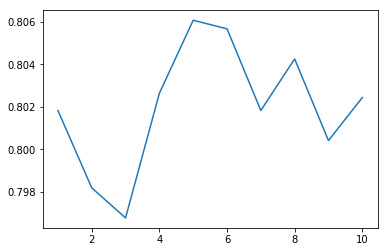

In [295]:
plt.plot([1,2,3,4,5,6,7,8,9,10],feature_accs)

In [297]:
X_feature_select = dataset[['tenure', 'Contract', 'MonthlyCharges', 'OnlineSecurity', 'InternetService']]

In [366]:
def test_out_current_params_cm(X_train, X_test, y_train, y_test, tree_amount, max_leaf, max_dep, min_samples):
    clf = RandomForestClassifier(n_estimators=tree_amount, max_depth=max_dep, min_samples_leaf=min_samples, max_leaf_nodes=max_leaf)
    model = clf.fit(X_train, y_train)
    average_precision = average_precision_score(y_test, clf.predict(X_test))
    precision, recall, _ = precision_recall_curve(y_test, clf.predict(X_test))
    step_kwargs = ({'step':'post'}
            if 'step' in signature(plt.fill_between).parameters
            else {})
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()
    predictions = clf.predict(X_test)
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    aucc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % aucc)
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # show the plot
    plt.show()
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    f1 = f1_score(y_test, predictions)
    aucc = auc(recall, precision)
    # calculate average precision score
    ap = average_precision_score(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the roc curve for the model
    plt.plot(recall, precision, marker='.')
    # show the plot
    plt.show()
    print(confusion_matrix(y_test, clf.predict(X_test)))

In [367]:
def test_curr_cm():
    X_train, X_test, y_train, y_test = split_data(0.3)
    test_out_current_params_cm(X_train, X_test, y_train, y_test, 100, 100, 10, 5)

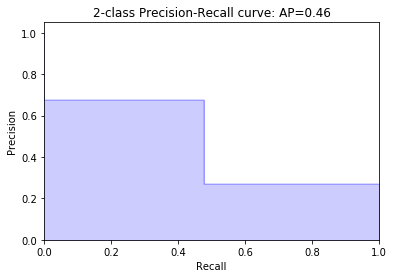

AUC: 0.839


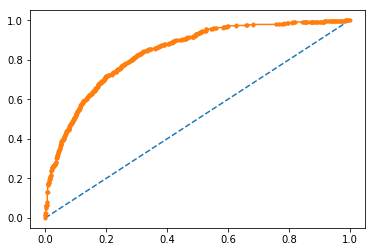

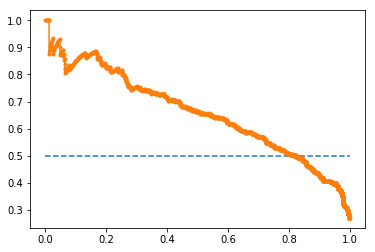

[[1417  130]
 [ 296  270]]


In [368]:
test_curr_cm()

In [ ]:
FPR = 165
TPR = 331

In [310]:
feature_imp = []
scores = []
for i in range(len(score_values)):
    feature_imp.append([score_values[i][0] , feature_names[i]])
for i in range(len(score_values)):
    scores.append(score_values[i][0])

In [314]:
fpr, tpr, threshholds = metrics.roc_curve(y_test, scores)

ValueError: Found input variables with inconsistent numbers of samples: [2113, 19]

In [315]:
len(y_test)

2113